# Supervised Learning

## 1) Regression

### 1-1) Linear Regression from scratch

In [0]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

# Step 1. Data Creation

In [0]:
m = 100

In [3]:
1/m # 0.01? 

0.01

In [0]:
x = np.random.randn(1,m) #100개의 랜덤한 가우시안 분포를 따르는 ~~
y = 3 * x + np.random.rand(1,m) * 5 #y에 랜덤값 넣는것은 일종의 노이즈

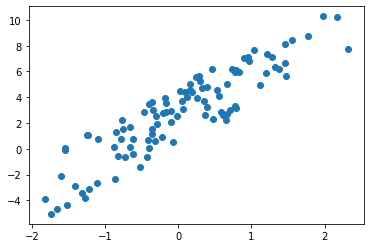

In [7]:
plt.scatter(x,y)

In [11]:
print (x.shape) #엑스가 1차원 짜리 데이터 100개라는 뜻
print (y.shape)

(1, 100)
(1, 100)


# Step 2. Model definition

In [0]:
def hypothesis(x, w, b): #w는 스칼라.. x라는 1차원 벡터와 스칼라의 곱이 아래 라인 설명
    pred = np.dot(x, w) + b #w1*x1 +w2*x2 + b 엑스원 엑스투는 피쳐feature
    return pred #프레드라는건 100개의 데이터를 계산



In [0]:
def cost(x, w, b, y):
    loss = 1/2*(hypothesis(x, w, b) - y)**2 # loss = 1/2(h(x) - y)^2
    cost = (1/m)*np.sum(loss, axis=1, keepdims=True) # cost = mean of batch losses
    return cost #로스는 100개의 데이터에 대한 로스를 계산하는거임
    #우리는 모든 데이터에 대한 평균 로스를 줄이는 방향으로 학습

In [0]:
def derivative(x, w, b, y):
    dw = ((1/m)*np.dot(x, (hypothesis(x, w, b) - y).T))[0][0] # d(cost)/dw =  (h(x) - y)(h(x))' = (h(x) - y)*x
    db = (1/m)*np.sum(hypothesis(x, w, b) - y) # d(cost)/db = (h(x) - y)(h(x))' = (h(x) -y) 바이어스에 대한 그래디언트 함수
    return dw, db
    #우리는 실제로 J함수 즉 비용함수를 쓰는게 아니라 그것을 미분한 값을 씀

In [0]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [0]:
# initialization of weights and bias
w = 0
b = 0  #컨벡스 펑션??

In [0]:
def train(_iter, x, w, b, y):
    for i in range(_iter):
        w, b = update(x, w, b, y, alpha=0.01) #업데이트함수를 계속 돌리면 w,b값을 새로 얻을 수 있다
    print ('cost =',cost(x, w, b, y)[0][0])
    print ('w =',w)
    print ('b =',b)
    print ('\n')
    return w, b

cost = 1.034744551279011
w = 3.063695966034666
b = 2.6490203963508647




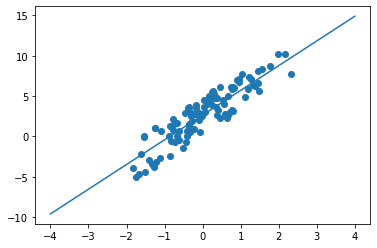

cost = 1.028019037128971
w = 3.102158120124685
b = 2.672129722836187




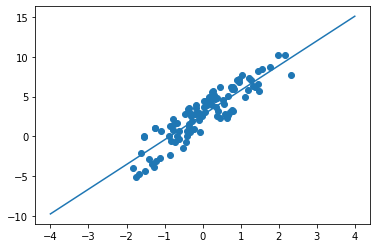

cost = 1.0241999308910048
w = 3.1314975574997206
b = 2.688938492610159




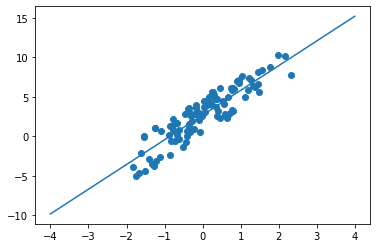

cost = 1.0220274888988126
w = 3.153884214813735
b = 2.70115435457736




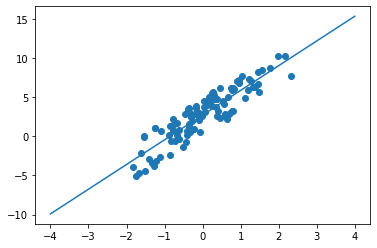

cost = 1.020789600507954
w = 3.1709703175549375
b = 2.7100243819399616




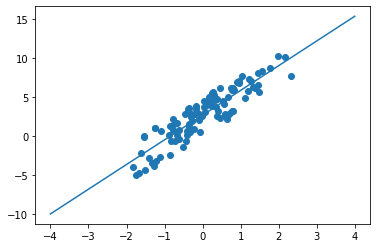

cost = 1.0200830295847227
w = 3.1840142963164286
b = 2.716458793168758




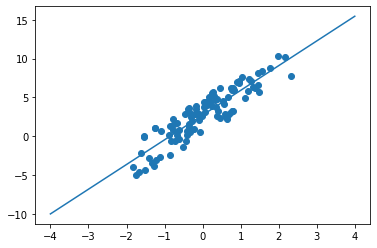

cost = 1.0196790469769474
w = 3.1939749420465464
b = 2.7211215514512745




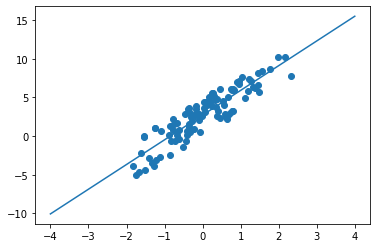

cost = 1.0194476852407028
w = 3.2015829735646006
b = 2.7244966842437797




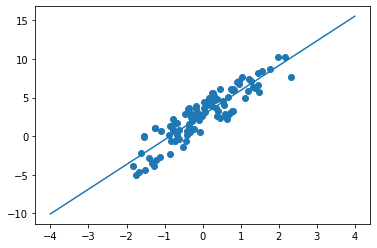

cost = 1.0193149673460957
w = 3.207395455212527
b = 2.7269368100622557




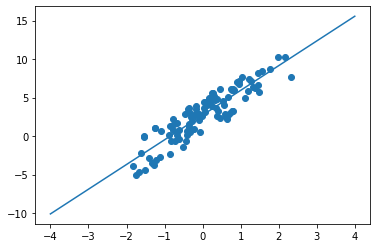

cost = 1.0192387135267706
w = 3.211837188559369
b = 2.728698630847659




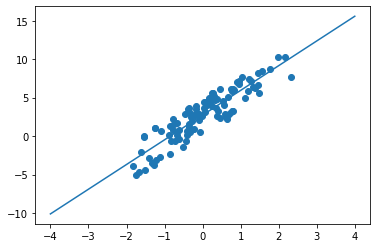

In [24]:
for i in range(10):
    w, b = train(30, x, w, b, y)
    plt.scatter(x,y)

    line_x = np.linspace(-4,4,100)
    plt.plot(line_x, line_x * w + b)
    plt.show()      #점차 데이터와 fit하는 w와 b를 얻을 수 있는걸 볼 수 있다.

### 1-2) Linear Regression with scikit-learn

In [0]:
from sklearn.linear_model import LinearRegression

In [28]:
reshaped_x = x.reshape((100,1))
reshaped_y = y.reshape((100,1))
model = LinearRegression() #리니어리그래션이라는 클래스를 사용해서 모델이라는 객체만듦
model.fit(reshaped_x,reshaped_y) #

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print ('w =', model.coef_)
print ('b =', model.intercept_)

w = [[3.22628415]]
b = [2.7331664]
